In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
df = pd.read_csv(r"C:\Users\aniyant\Desktop\archive\insurance.csv")

In [9]:
df.shape

(1338, 7)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

### In Data analysis we will analyze to find the below stuff
1. Missing Values
2. All the numerical variables
4. Distribution of the numerical variables
5. Categorical Variables
6. Outliers
7. Relationship between independent and dependent features
8. Correlations

In [37]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [38]:
target_col = df["expenses"]

In [71]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [4]:
numerical_columns = [col for col in df.columns if df[col].dtypes != "O"]

In [5]:
numerical_columns

['age', 'bmi', 'children', 'expenses']

In [6]:
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [7]:
categorical_columns

['sex', 'smoker', 'region']

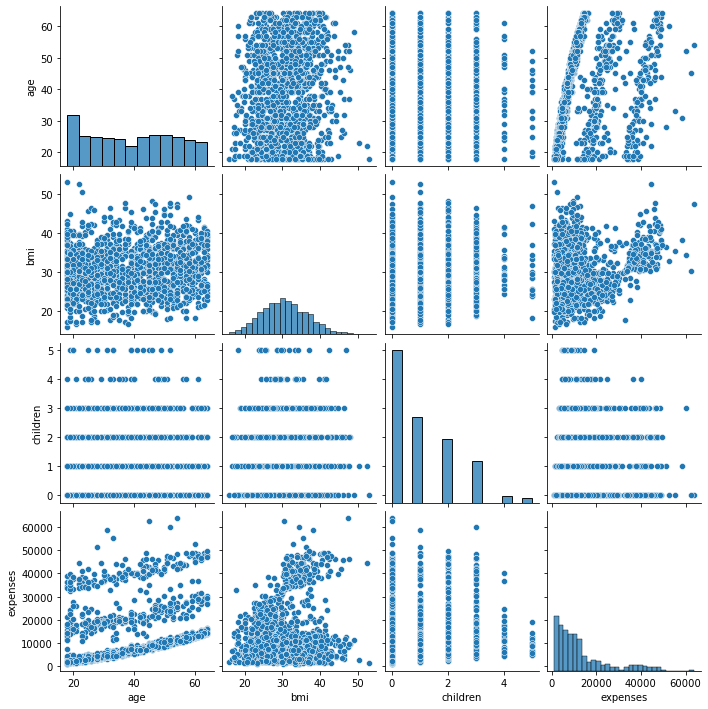

In [49]:
sns.pairplot(df)

C:\Users\aniyant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

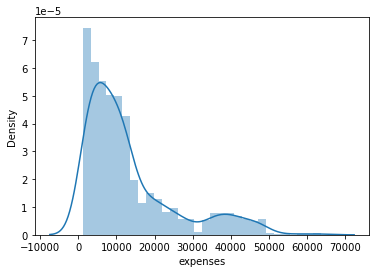

In [50]:
sns.distplot(df["expenses"])

C:\Users\aniyant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

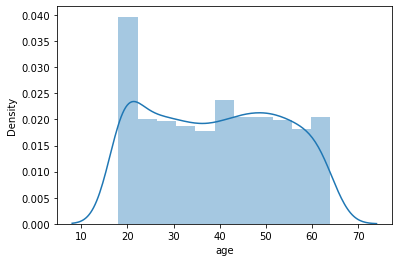

In [55]:
sns.distplot(df["age"])

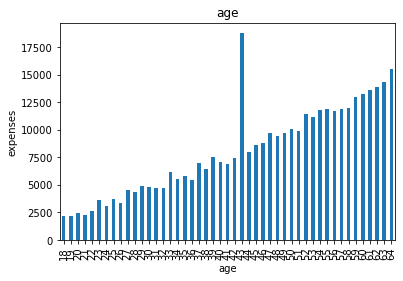

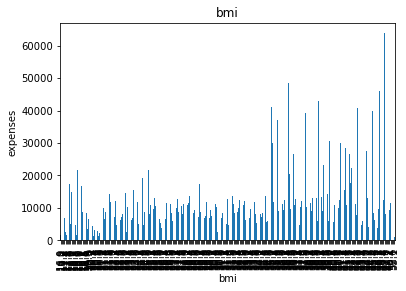

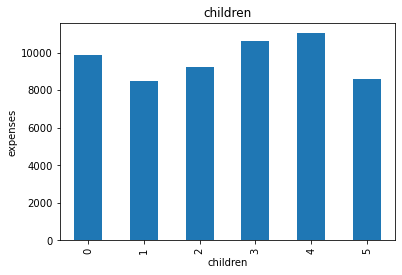

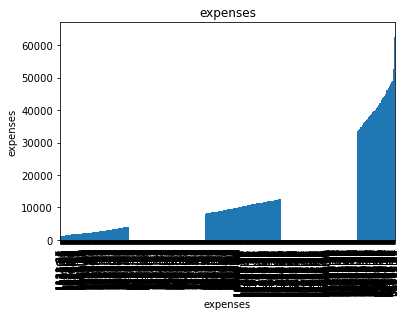

In [61]:
data=df.copy()
for feature in numerical_columns:
    data.groupby(feature)['expenses'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('expenses')
    plt.title(feature)
    plt.show()

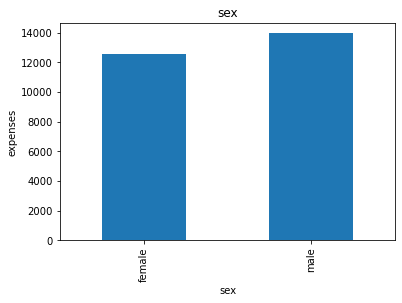

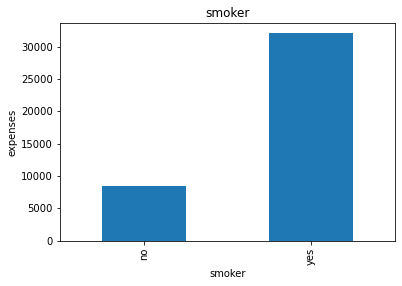

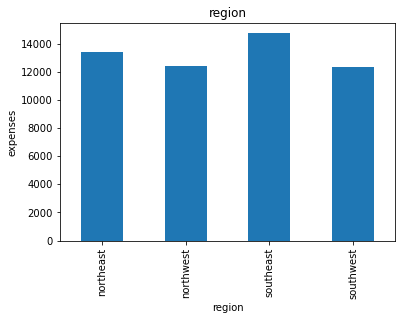

In [64]:
data=df.copy()
for feature in categorical_columns:
    data.groupby(feature)['expenses'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('expenses')
    plt.title(feature)
    plt.show()

In [ ]:
# observation
people who doesn't smoke have less expenses on the premium of insurance

<AxesSubplot:xlabel='expenses', ylabel='Count'>

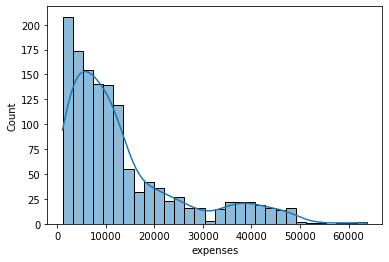

In [68]:
sns.histplot(df['expenses'],kde = True)

C:\Users\aniyant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

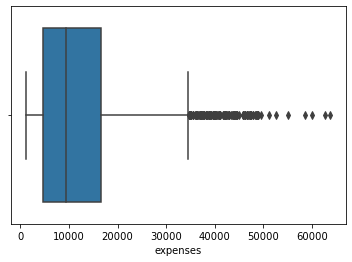

In [75]:
# checking outliers in data
sns.boxplot(df['expenses'])

In [ ]:
# obeservation 
There is outliers in the dataset but we will ignore as dataset is small

In [81]:
# Relationship between independent and dependent feature
#sns.heatmap(data = df['bmi'])

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
df["expenses_category"] = pd.cut(
                df["expenses"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )
            

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index,test_index in split.split(df, df["expenses_category"]):
    strat_train_set = df.loc[train_index].drop(["expenses_category"],axis=1)
    strat_test_set = df.loc[test_index].drop(["expenses_category"],axis=1)


In [65]:
strat_train_set

,age,sex,bmi,children,smoker,region,expenses
1155,36,female,22.1,3,no,northeast,7228.22
388,26,female,22.6,0,no,northwest,3176.82
1329,52,male,38.6,2,no,southwest,10325.21
762,33,male,27.1,1,yes,southwest,19040.88
1007,47,male,28.2,3,yes,northwest,24915.22
...,...,...,...,...,...,...,...
451,30,male,24.1,1,no,northwest,4032.24
255,55,female,25.4,3,no,northeast,13047.33
1022,47,male,36.1,1,yes,southeast,42211.14
1032,30,female,27.9,0,no,northeast,4137.52


In [116]:
strat_test_set

,age,sex,bmi,children,smoker,region,expenses
1153,35,female,35.8,1,no,northwest,5630.46
641,42,male,28.3,3,yes,northwest,32787.46
345,34,female,29.3,3,no,southeast,6184.30
166,20,female,37.0,5,no,southwest,4830.63
951,51,male,42.9,2,yes,southeast,47462.89
...,...,...,...,...,...,...,...
698,56,male,33.7,0,no,northwest,10976.25
1225,33,female,39.8,1,no,southeast,4795.66
1126,55,male,29.9,0,no,southwest,10214.64
37,26,male,20.8,0,no,southwest,2302.30


In [13]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [14]:
categorical_columns

['sex', 'smoker', 'region']

In [16]:
#numerical_columns.remove('expenses')
numerical_columns

['age', 'bmi', 'children']

In [82]:
num_pipeline = Pipeline(steps=[
                ('imputer',SimpleImputer(strategy="median")),
                ('scaler',StandardScaler())
            ])

cat_pipeline = Pipeline(steps=[
                ('imputer',SimpleImputer(strategy="most_frequent")),
                ('one_hot_encoder',OneHotEncoder()),
                ('scaler',StandardScaler(with_mean=False))
            ])
        

preprocessing = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns),
    ('cat_pipeline',cat_pipeline,categorical_columns),
    ])
                


In [83]:
input_train_arr = preprocessing.fit_transform(strat_train_set.drop(['expenses'],axis=1))
input_test_arr = preprocessing.transform(strat_test_set.drop(['expenses'],axis=1))


In [84]:
input_train_arr.shape

(1070, 11)

In [85]:
input_test_arr.shape

(268, 11)

In [20]:
target_train_arr = np.array(strat_train_set['expenses'])
target_test_arr = np.array(strat_test_set['expenses'])

In [86]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [136]:
linear.fit(input_train_arr,target_train_arr)

LinearRegression()

In [87]:
linear.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [138]:
linear.intercept_

5.092023561466515e+16

In [141]:
linear.score(input_train_arr,target_train_arr)

0.7504818054047155

In [142]:
linear.score(input_test_arr,target_test_arr)

-1.9163740125566548e+23

In [148]:
pred = linear.predict(input_test_arr)

In [29]:
from sklearn.metrics import r2_score

In [149]:
r2_score(target_test_arr,pred)

-1.9163740125566548e+23

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
reg = RandomForestRegressor()

In [23]:
reg.fit(input_train_arr,target_train_arr)

RandomForestRegressor()

In [24]:
reg.score(input_train_arr,target_train_arr)

0.9772886193493533

In [27]:
pred = reg.predict(input_train_arr)

In [30]:
r2_score(target_train_arr,pred)

0.9772886193493533

In [31]:
pred_test = reg.predict(input_test_arr)

In [32]:
reg.score(input_test_arr,target_test_arr)

0.8330068930189802

In [33]:
r2_score(target_test_arr,pred_test)

0.8330068930189802

In [51]:
df.head(1)

,age,sex,bmi,children,smoker,region,expenses,expenses_category
0,19,female,27.9,0,yes,southwest,16884.92,5


In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'expenses_category'],
      dtype='object')

In [ ]:
import dill 
with

In [115]:
arr = np.array([[20,'male',27.9,3,'yes','southwest']])
data_df = pd.DataFrame(arr,columns=['age','sex', 'bmi', 'children', 'smoker', 'region'])
print(data_df)
pre_arr = preprocessing.transform(data_df)
reg.predict(pre_arr)

  age   sex   bmi children smoker     region
0  20  male  27.9        3    yes  southwest


array([18147.7524])

In [95]:
#reg.predict([[19,'female',27.9,0,'yes','southwest']])

In [96]:
#reg.predict(strat_train_set)

In [116]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'expenses_category'],
      dtype='object')

In [135]:
def get_log_dataframe(file_path):
    data = []
    with open(file_path) as log_file:
        for line in log_file.readlines():
            data.append(line.split("^;"))
    print(data)
    log_df = pd.DataFrame(data)
    print(log_df.shape)
    print(log_df)
    columns = ["Time stamp", "Log Level", "line number", "file name", "function name", "message"]
    log_df.columns = columns

    log_df["log_message"] = log_df['Time stamp'].astype(str) + ":$" + log_df["message"]

    return log_df[["log_message"]]

In [136]:
get_log_dataframe(r"C:\Users\aniyant\Visual-Code-Projects\ml-project\Insurance-Premium-Prediction\logs\log_2022-07-27-17-21-28.log")

[['[2022-07-27 17:21:31,410] werkzeug - INFO -  * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)\n'], ['[2022-07-27 17:21:48,503] werkzeug - INFO - 127.0.0.1 - - [27/Jul/2022 17:21:48] "GET / HTTP/1.1" 200 -\n'], ['[2022-07-27 17:21:53,892] werkzeug - INFO - 127.0.0.1 - - [27/Jul/2022 17:21:53] "GET /artifact HTTP/1.1" 200 -\n'], ['[2022-07-27 17:21:57,252] root - INFO - req_path: logs\n'], ['[2022-07-27 17:21:57,260] werkzeug - INFO - 127.0.0.1 - - [27/Jul/2022 17:21:57] "GET /logs HTTP/1.1" 200 -\n'], ['[2022-07-27 17:22:19,044] root - INFO - req_path: logs/log_2022-07-27-17-21-28.log\n'], ['[2022-07-27 17:22:19,276] root - INFO - req_path: logs/log_2022-07-27-17-21-28.log\n'], ['[2022-07-27 17:22:19,436] app - ERROR - Exception on /logs/logs/log_2022-07-27-17-21-28.log [GET]\n'], ['Traceback (most recent call last):\n'], ['  File "C:\\Users\\aniyant\\anaconda3\\envs\\venv\\lib\\site-packages\\flask-2.1.3-py3.10.egg\\flask\\app.py", line 2073, in wsgi_app\n'], ['    response

ValueError: Length mismatch: Expected axis has 1 elements, new values have 6 elements